In [8]:
# - [ ] How is the model actually classifying the images
# - [ ] Writing and getting a working model
# - [ ] Improving the code/ fixing bug
# - [ ] Preparing the presentation 


# How knn is actually implemented into our project
# A: Implement Our own version of KNN if we have the time. Use existing libraries for now

# Basic knn model implemented 
# How r we representing data
#A: the data is organised by folders with each folder having an id and 72 images(png) corresponding to that id


# How to figure out which k?
# A: a) play around with different K and see which gives the best accurancy 
#    b) use graph to see which k gives the best accuracy

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import cv2  as cv
from sklearn.metrics import accuracy_score

In [9]:
dataset = "subjects_0-1999_72_imgs"
labels = os.listdir(dataset)
X_data = []
Y_data = []
i = 0 
for label in labels:
    if i == 10:
        break
    if label == ".DS_Store":
        continue
    for file in os.listdir(os.path.join(dataset, label)):
        img = cv.imread(os.path.join(dataset, label, file))
        img = cv.resize(img, (64, 64))
        X_data.append(img)
        Y_data.append(label)
    i += 1
X_data = np.array(X_data)
Y_data = np.array(Y_data)
X_data = X_data.reshape((X_data.shape[0], -1))
Y_data = Y_data.reshape((Y_data.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(648, 12288) (72, 12288) (648, 1) (72, 1)


In [12]:
knn = KNeighborsClassifier(n_neighbors=int(np.sqrt(X_train.shape[0])))
fitted = knn.fit(X_train, y_train)

/Users/devgoyal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
from sklearn.metrics import accuracy_score
y_pred= knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.3611111111111111


In [3]:
X_train.shape

(6480, 12288)

/Users/devgoyal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devgoyal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/devgoyal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devgoyal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

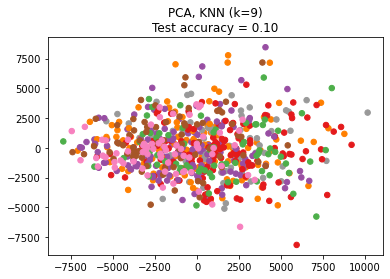

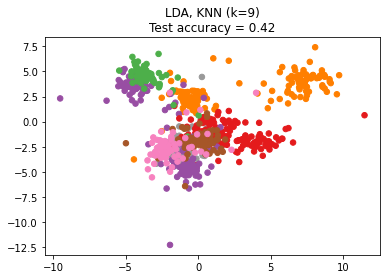

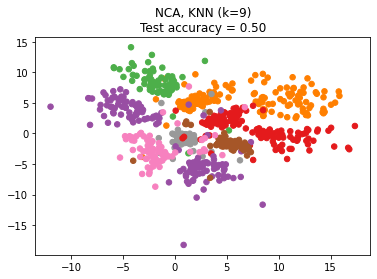

In [14]:
dim = len(X_data[0])
n_classes = len(np.unique(Y_data))

# Reduce dimension to 2 with PCA
pca = make_pipeline(PCA(n_components=2, random_state=42))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(NeighborhoodComponentsAnalysis(n_components=2, random_state=42))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=9)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X_data)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=Y_data, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, 9, acc_knn)
    )
plt.show()